<a href="https://colab.research.google.com/github/bldev2473/KaggleWithColab/blob/main/TrendingYouTubeVideoStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datasnaek/youtube-new

401 - Unauthorized


In [ ]:
!ls

kaggle.json  sample_data  youtube-new.zip


In [ ]:
import zipfile
with zipfile.ZipFile('youtube-new.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!ls

CA_category_id.json  IN_category_id.json  MXvideos.csv
CAvideos.csv	     INvideos.csv	  RU_category_id.json
DE_category_id.json  JP_category_id.json  RUvideos.csv
DEvideos.csv	     JPvideos.csv	  sample_data
FR_category_id.json  kaggle.json	  US_category_id.json
FRvideos.csv	     KR_category_id.json  USvideos.csv
GB_category_id.json  KRvideos.csv	  youtube-new.zip
GBvideos.csv	     MX_category_id.json


In [ ]:
import pandas as pd
pd.read_csv('KRvideos.csv', encoding='utf-8')

UnicodeDecodeError: ignored

In [ ]:
pd.read_csv('KRvideos.csv', encoding='ISO-8859-1')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,25,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...
34565,uXvjxeg08eQ,18.14.06,ìëì ìì ì°¸ê¸° ìì ìëì GO X-...,ìí,22,2018-06-11T11:57:20.000Z,"ìëì|""ìëì ê³ ""|""ìëì GO""|""ìì...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,ìëì ìì ì°¸ê¸° ìì í­ì ì¢ìí...


In [ ]:
with open('KRvideos.csv', 'rb') as f:
    print(f)

<_io.BufferedReader name='KRvideos.csv'>


In [ ]:
pip install chardet

In [ ]:
import chardet

with open('KRvideos.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
sourceEncoding = "utf-8"
targetEncoding = "ISO-8859-1"

import codecs
BLOCKSIZE = 1048576 # or some other, desired size in bytes
with codecs.open('KRvideos.csv', "r", sourceEncoding) as sourceFile:
    with codecs.open('KRvideos_.csv', "w", targetEncoding) as targetFile:
        while True:
            contents = sourceFile.read(BLOCKSIZE)
            if not contents:
                break
            targetFile.write(contents)

UnicodeDecodeError: ignored

In [ ]:
df = pd.read_csv('KRvideos.csv', encoding='ISO-8859-1')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...


In [ ]:
df.to_csv('KRvideos_.csv')

In [ ]:
!ls

CA_category_id.json  IN_category_id.json  MX_category_id.json
CAvideos.csv	     INvideos.csv	  MXvideos.csv
DE_category_id.json  JP_category_id.json  RU_category_id.json
DEvideos.csv	     JPvideos.csv	  RUvideos.csv
FR_category_id.json  kaggle.json	  sample_data
FRvideos.csv	     KR_category_id.json  US_category_id.json
GB_category_id.json  KRvideos_.csv	  USvideos.csv
GBvideos.csv	     KRvideos.csv	  youtube-new.zip


In [ ]:
df = pd.read_csv('KRvideos_.csv', encoding='utf-8')
df.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22.0,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130.0,1422.0,40.0,272.0,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25.0,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533.0,211.0,28.0,113.0,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22.0,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409.0,5112.0,166.0,459.0,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25.0,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850.0,2093.0,173.0,1219.0,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25.0,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466.0,1094.0,109.0,450.0,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...


In [ ]:
with open('KRvideos_.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
from google.colab import files

files.upload()

Saving KRvideos.csv to KRvideos.csv


In [4]:
!ls

KRvideos.csv  sample_data


In [5]:
import pandas as pd

df = pd.read_csv('KRvideos.csv', error_bad_lines=False)
df.head()

b'Skipping line 650: expected 16 fields, saw 30\nSkipping line 869: expected 16 fields, saw 30\nSkipping line 4773: expected 16 fields, saw 25\nSkipping line 5417: expected 16 fields, saw 25\nSkipping line 5648: expected 16 fields, saw 25\nSkipping line 5856: expected 16 fields, saw 30\nSkipping line 8407: expected 16 fields, saw 25\nSkipping line 8445: expected 16 fields, saw 25\nSkipping line 8646: expected 16 fields, saw 31\nSkipping line 8675: expected 16 fields, saw 25\nSkipping line 9753: expected 16 fields, saw 25\nSkipping line 10009: expected 16 fields, saw 30\nSkipping line 10208: expected 16 fields, saw 25\nSkipping line 18211: expected 16 fields, saw 25\nSkipping line 25199: expected 16 fields, saw 25\nSkipping line 25404: expected 16 fields, saw 25\nSkipping line 25543: expected 16 fields, saw 31\nSkipping line 25750: expected 16 fields, saw 25\nSkipping line 27143: expected 16 fields, saw 25\nSkipping line 27601: expected 16 fields, saw 25\nSkipping line 27742: expected 1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [6]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [7]:
df.items

<bound method DataFrame.items of           video_id  ...                                        description
0      RxGQe4EeEpA  ...  윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1      hH7wVE8OlQ0  ...  [채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2      9V8bnWUmE9U  ...                                    퍼가실때 꼭 출처 부탁드려요
3      0_8py-t5R80  ...                                다스는 누구겁니까 듣고 난 후 표정
4      bk55RbxiQdI  ...  김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...            ...  ...                                                ...
34497  pj6YBBrO1sQ  ...  - 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34498  _Ne9ER-jr20  ...  안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ...
34499  xuOQq_fzEjk  ...  2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34500  uXvjxeg08eQ  ...  워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...
34501  C-bLqIftDY4  ...  3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ...

[34502 rows x 16 columns]>

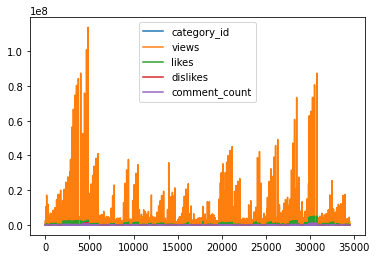

In [8]:
import matplotlib.pyplot as plt

df.plot() 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

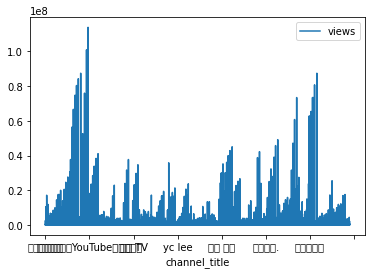

In [9]:
df.plot(x='channel_title', y='views')

In [10]:
from matplotlib import font_manager as fm

In [11]:
!apt -qq -y install fonts-nanum > /dev/null

In [12]:
fm._rebuild()
plt.rc('font', family='NanumBarunGothic')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

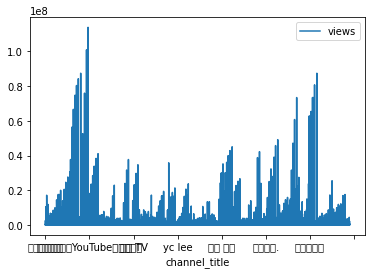

In [13]:
df.plot(x='channel_title', y='views')

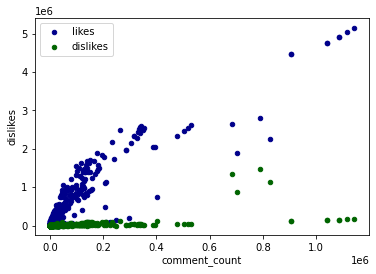

In [14]:
# views likes dislikes comment_count 관계
ax = df.plot.scatter(x='comment_count', y='likes', color='DarkBlue', label='likes');
df.plot.scatter(x='comment_count', y='dislikes', color='DarkGreen', label='dislikes', ax=ax);

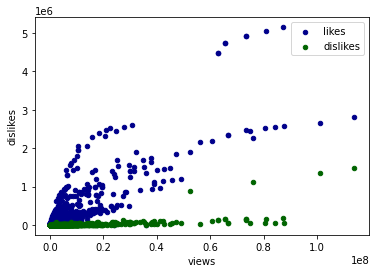

In [15]:
ax = df.plot.scatter(x='views', y='likes', color='DarkBlue', label='likes');
df.plot.scatter(x='views', y='dislikes', color='DarkGreen', label='dislikes', ax=ax);

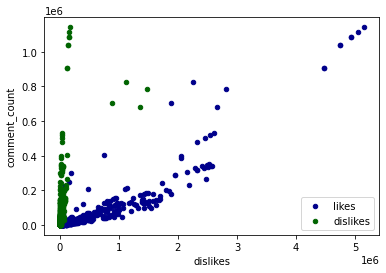

In [18]:
ax = df.plot.scatter(x='likes', y='comment_count', color='DarkBlue', label='likes');
df.plot.scatter(x='dislikes', y='comment_count', color='DarkGreen', label='dislikes', ax=ax);

In [16]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.082456,-0.098057,-0.016746,-0.065094,0.027149,0.054142,-0.042928
views,-0.082456,1.000000,0.860058,0.581454,0.807614,-0.003352,-0.019316,-0.002118
likes,-0.098057,0.860058,1.000000,0.428034,0.922730,-0.010713,-0.021423,-0.000238
dislikes,-0.016746,0.581454,0.428034,1.000000,0.555548,-0.002042,-0.008091,-0.000591
comment_count,-0.065094,0.807614,0.922730,0.555548,1.000000,-0.011518,-0.014324,-0.000883
comments_disabled,0.027149,-0.003352,-0.010713,-0.002042,-0.011518,1.000000,0.221221,-0.004217
ratings_disabled,0.054142,-0.019316,-0.021423,-0.008091,-0.014324,0.221221,1.000000,-0.007094
video_error_or_removed,-0.042928,-0.002118,-0.000238,-0.000591,-0.000883,-0.004217,-0.007094,1.000000


In [21]:
import numpy as np

df['category_name'] = np.nan

In [22]:
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [42]:
print(df.category_name.unique())

['People and Blogs' 'News & Politics' 'Sport' 'Travel and Events' 'Comedy'
 'Music' 'Entertainment' 'Pets and Animals' 'Film and Animation' nan
 'Science and Technology' 'Gaming' 'Non Profits and Activism'
 'Cars and Vehicles' 'Education' 'How to and Style']


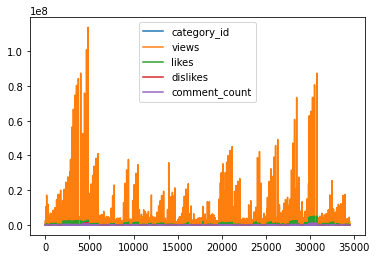

In [27]:
df.plot()

In [30]:
df_category_name = df[['category_name', 'views']]

In [31]:
df_category_name.head()

,category_name,views
0,People and Blogs,156130
1,News & Politics,76533
2,People and Blogs,421409
3,News & Politics,222850
4,News & Politics,84466


In [47]:
print(df.category_name)

0                People and Blogs
1                 News & Politics
2                People and Blogs
3                 News & Politics
4                 News & Politics
                   ...           
34497               Entertainment
34498               Entertainment
34499             News & Politics
34500            People and Blogs
34501    Non Profits and Activism
Name: category_name, Length: 34502, dtype: object


In [48]:
df_category_name.groupby('category_name').sum()

,views
category_name,
Cars and Vehicles,14384059
Comedy,737086018
Education,73336477
Entertainment,4565199108
Film and Animation,1196246253
Gaming,391576430
How to and Style,175520028
Music,3796195856
News & Politics,1169922785


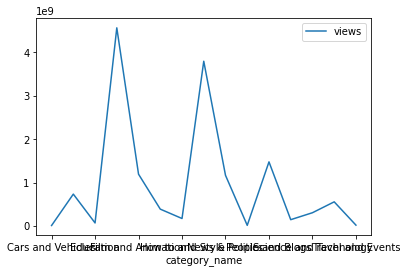

In [51]:
df_category_name.groupby('category_name').sum().plot()

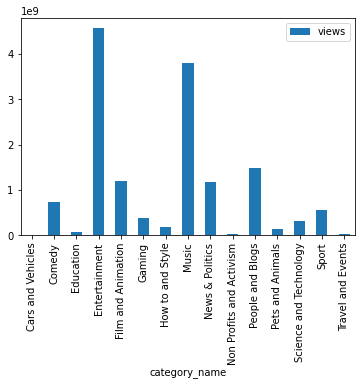

In [53]:
df_category_name.groupby('category_name').sum().plot(kind='bar')